### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Optional: Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Read Data

In [2]:
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Adjusting the code to store multiple values for each key in a list

# Initialize an empty dictionary to store the result
categories_dict = {}

with open('data_description.txt', 'r') as file:
    lines = file.readlines()

# Initialize variables
current_key = None

# Iterate through the lines of the file
for line in lines:
    stripped_line = line.strip()
    if not stripped_line:
        # Ignore empty lines
        continue

    if not line.startswith(" "):
        # This is a new key (without space at the beginning)
        current_key = stripped_line.split(":")[0]
        categories_dict[current_key] = []
    elif current_key and line.startswith(" "):
        # This is a value for the current key (with space at the beginning)
        # Add the first word of the line to the list for the current key
        first_word = stripped_line.split()[0]
        categories_dict[current_key].append(first_word)

# Print the resulting dictionary
print(categories_dict)


{'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190'], 'MSZoning': ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 'LotFrontage': [], 'LotArea': [], 'Street': ['Grvl', 'Pave'], 'Alley': ['Grvl', 'Pave', 'NA'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'], 'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'BldgType': ['1Fam', '2FmCo

In [5]:
# Find entries in the dataset that are not in the categories dictionary
for column in df_raw.columns:
    # Check if the column is categorical
    if df_raw[column].dtype == "object":
        # Check if the column is in the categories dictionary
        if column not in categories_dict:
            print(f"Column '{column}' not found in the categories dictionary.")
        else:
            # Check if all values in the column are in the categories dictionary
            for value in df_raw[column].unique():
                if value not in categories_dict[column]:
                    print(f"Value '{value}' in column '{column}' not found in the categories dictionary.")

Value 'C (all)' in column 'MSZoning' not found in the categories dictionary.
Value 'nan' in column 'Alley' not found in the categories dictionary.
Value 'NAmes' in column 'Neighborhood' not found in the categories dictionary.
Value '2fmCon' in column 'BldgType' not found in the categories dictionary.
Value 'Duplex' in column 'BldgType' not found in the categories dictionary.
Value 'Twnhs' in column 'BldgType' not found in the categories dictionary.
Value 'Wd Sdng' in column 'Exterior1st' not found in the categories dictionary.
Value 'Wd Shng' in column 'Exterior2nd' not found in the categories dictionary.
Value 'Wd Sdng' in column 'Exterior2nd' not found in the categories dictionary.
Value 'CmentBd' in column 'Exterior2nd' not found in the categories dictionary.
Value 'Brk Cmn' in column 'Exterior2nd' not found in the categories dictionary.
Value 'nan' in column 'MasVnrType' not found in the categories dictionary.
Value 'nan' in column 'BsmtQual' not found in the categories dictionary.

In [6]:
print(categories_dict['MSZoning'])
print(categories_dict['Neighborhood'])
print(categories_dict['BldgType'])
print(categories_dict['Exterior1st'])
print(categories_dict['Exterior2nd'])

['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM']
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']
['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd', 'WdShing']
['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd', 'WdShing']


In [7]:
df_raw.loc[df_raw['MSZoning'] == 'C (all)', 'MSZoning'] = 'C'
df_raw.loc[df_raw['Neighborhood'] == 'NAmes', 'MSZoning'] = 'Names'
df_raw.loc[df_raw['BldgType'] == '2fmCon', 'MSZoning'] = '2FmCon'
df_raw.loc[df_raw['BldgType'] == 'Duplex', 'MSZoning'] = 'Duplx'
df_raw.loc[df_raw['BldgType'] == 'Twnhs', 'MSZoning'] = 'nan'
df_raw.loc[df_raw['Exterior1st'] == 'Wd Sdng', 'MSZoning'] = 'WdShing'
df_raw.loc[df_raw['Exterior2nd'] == 'Wd Sdng', 'MSZoning'] = 'WdShing'
df_raw.loc[df_raw['Exterior2nd'] == 'CmentBd', 'MSZoning'] = 'CemntBd'
df_raw.loc[df_raw['Exterior2nd'] == 'Brk Cmn', 'MSZoning'] = 'BrkComm'

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Display the entire DataFrame
display(df_raw.describe(include='all'))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,12,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,738,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

### Exploratory Data Analysis 

In [10]:
# Copy the dataframe
df = df_raw.copy()

# Drop the columns that are not needed
df = df.drop(['Id'], axis=1)


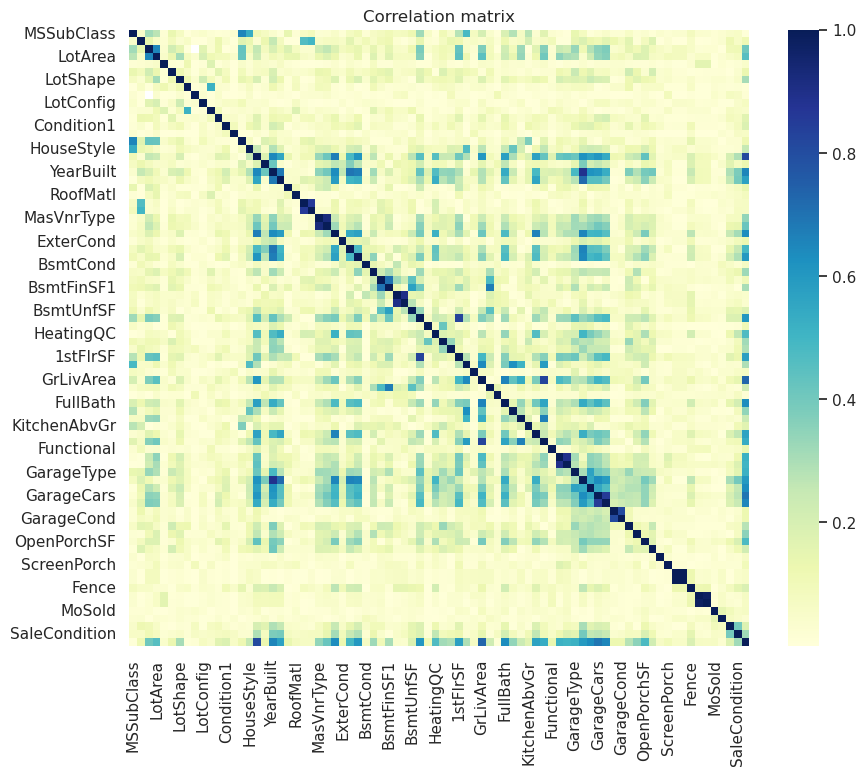

In [11]:
from sklearn.preprocessing import LabelEncoder

#Copy the dataframe
df_eda = df.copy()

# Identify the categorical columns
categorical_columns = df_eda.select_dtypes(include=['object']).columns

# Transform categorical variables 
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_eda[column] = label_encoder.fit_transform(df_eda[column].astype(str))

# Correlation matrix
corr = df_eda.corr('spearman').abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='YlGnBu')
plt.title('Correlation matrix')
plt.show()

### Preprocessing

In [12]:
from sklearn.model_selection import train_test_split


# Define the features and the target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the numerical and categorical features
numerical_features= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
categorical_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
ordinal_features = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'FireplaceQu']

In [13]:
# NA values for numerical features and categorical features
numerical_na = df[numerical_features].isna().sum()
categorical_na = df[categorical_features].isna().sum()
ordinal_na = df[ordinal_features].isna().sum()

# Display only columns with non-zero missing values
display(numerical_na[numerical_na > 0].sort_values(ascending=False))
display(categorical_na[categorical_na > 0].sort_values(ascending=False))
display(ordinal_na[ordinal_na > 0].sort_values(ascending=False))

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

MiscFeature    1406
Alley          1369
MasVnrType      872
GarageType       81
Electrical        1
dtype: int64

PoolQC          1453
Fence           1179
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
dtype: int64

In [14]:
# Create the dictionary with unique values for each ordinal feature
categories_df_dict = {feature: df[feature].dropna().unique().tolist() for feature in ordinal_features}

# Iterate through each key in categories_dict
for key in categories_dict:
    if key in categories_df_dict:
        # Filter values in categories_dict[key] that are either in categories_df_dict[key] or equal to 'NA'
        categories_dict[key] = [value for value in categories_dict[key] 
                                if value in categories_df_dict[key] or value == 'NA']

# Print the updated dictionary
print(categories_dict)

{'MSSubClass': ['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190'], 'MSZoning': ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], 'LotFrontage': [], 'LotArea': [], 'Street': ['Grvl', 'Pave'], 'Alley': ['Grvl', 'Pave', 'NA'], 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'], 'LandContour': ['Lvl', 'Bnk', 'HLS', 'Low'], 'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'], 'LotConfig': ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'], 'LandSlope': ['Gtl', 'Mod', 'Sev'], 'Neighborhood': ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'Condition2': ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe'], 'BldgType': ['1Fam', '2FmCo

In [15]:
#  Fix skewness in the numerical features
from scipy.stats import skew

# Calculate the skewness of the numerical features
skewness = X_train[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# Calculate the skeweness for the target variable
target_skew = skew(y_train)

# Filter the numerical features with skewness greater than 0.5
skewness = skewness[abs(skewness) > 0.5]

# Apply the Box-Cox transformation to fix the skewness
from scipy.special import boxcox1p

# Define the skewness transformation threshold
skewness_threshold = 0.5

# Apply the Box-Cox transformation to the numerical features with skewness greater than the threshold
for feature in skewness.index:
    X_train[feature] = boxcox1p(X_train[feature], 0.15)
    X_test[feature] = boxcox1p(X_test[feature], 0.15)

if target_skew > 0.5:
    # Apply the Box-Cox transformation to the target variable
    y_train = boxcox1p(y_train, 0.15)
    y_test = boxcox1p(y_test, 0.15)

# Calculate the skewness of the transformed numerical features
skewness_X = X_train[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness_y = skew(y_train)

# Display the skewness of the transformed numerical features and the target variable
display(skewness_X)
display(skewness_y)

PoolArea         14.222547
3SsnPorch         7.692197
LowQualFinSF      7.487762
MiscVal           5.069276
BsmtHalfBath      3.815358
KitchenAbvGr      3.585994
ScreenPorch       3.075593
BsmtFinSF2        2.716584
EnclosedPorch     2.258918
LotArea           0.986018
HalfBath          0.574630
BsmtFullBath      0.448770
MSSubClass        0.392268
2ndFlrSF          0.286346
MoSold            0.266542
BedroomAbvGr      0.257421
Fireplaces        0.247014
WoodDeckSF        0.236589
1stFlrSF          0.194988
GrLivArea         0.185678
OverallQual       0.146824
YrSold            0.088937
OpenPorchSF       0.075037
GarageArea        0.071752
FullBath          0.053566
TotRmsAbvGrd      0.042958
OverallCond      -0.169523
GarageCars       -0.439389
YearRemodAdd     -0.499142
BsmtFinSF1       -0.508039
YearBuilt        -0.642362
BsmtUnfSF        -1.544053
TotalBsmtSF      -4.087874
LotFrontage            NaN
MasVnrArea             NaN
GarageYrBlt            NaN
dtype: float64

0.3301816030556257

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
import pandas as pd


# Define preprocessing for numerical features (Imputation only)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

# Define preprocessing for categorical features (Imputation + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the ordinal transformer using the categories from categories_dict
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories=[categories_dict[var] for var in ordinal_features]))
])

# Combine preprocessing steps for each type of feature (without scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Fit and transform the training data without scaling
X_train_noscaled = preprocessor.fit_transform(X_train)
X_test_noscaled = preprocessor.transform(X_test)

# Define the full pipeline with scaling applied after encoding
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Apply all feature transformations
    ('scaler', RobustScaler())        # Apply scaling after encoding
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Convert the scaled data into a DataFrame 
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=feature_names)

# Convert the noscaled data into a DataFrame
X_train_noscaled_df = pd.DataFrame(X_train_noscaled, index=X_train.index, columns=feature_names)
X_test_noscaled_df = pd.DataFrame(X_test_noscaled, index=X_test.index, columns=feature_names)

# Scaled the target variable
label_scaler = RobustScaler()
y_train_scaled = label_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = label_scaler.transform(y_test.values.reshape(-1, 1)).flatten()


# Verify the shapes
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)


(1022, 237)
(438, 237)
(1022,)
(438,)


### Models

In [18]:
rs = 42

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Linear Regression

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

linear = LinearRegression()
linear_grid_search = GridSearchCV(estimator=linear, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ridge Regression

param_grid = {  
    'alpha': np.linspace(0.000001, 0.1, 5),
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

ridge = Ridge(random_state=rs)
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Lasso Regression

param_grid = {
    'alpha': np.linspace(0.000001, 0.1, 5),
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

lasso = Lasso(random_state=rs)
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# LassoLars Regression

param_grid = {
    'alpha': np.linspace(0.000001, 0.1, 5),
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lassolars = LassoLars(random_state=rs)
lassolars_grid_search = GridSearchCV(estimator=lassolars, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# ElasticNet Regression

param_grid = {
    'alpha': np.linspace(0.000001, 0.1, 5),
    'l1_ratio': np.linspace(0.000001, 1, 5),
    'fit_intercept': [True, False],
    'positive': [True, False]
}

elasticnet = ElasticNet(random_state=rs)
elasticnet_grid_search = GridSearchCV(estimator=elasticnet, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Random Forest Regression

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_forest = RandomForestRegressor(random_state=rs)
random_forest_grid_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=1)


# MLP Regression

param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': np.logspace(-1, 1, 5),
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPRegressor(random_state=rs)
mlp_grid_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=1)

# Models dictionary

models = {
    'Linear Regression': linear_grid_search,
    'Ridge Regression': ridge_grid_search,
    'Lasso Regression': lasso_grid_search,
    'LassoLars Regression': lassolars_grid_search,
    'ElasticNet Regression': elasticnet_grid_search,
    'Random Forest Regression': random_forest_grid_search, 
    'MLP Regression': mlp_grid_search
}


### Model training and Evaluation

In [20]:
### Model training and Evaluation Function 
def evaluate_models(models=models, 
                    X_train_noscaled=X_train_noscaled,
                    X_test_noscaled=X_test_noscaled, 
                    X_train_scaled=X_train_scaled, 
                    X_test_scaled=X_test_scaled,
                    y_train=y_train_scaled, 
                    y_test=y_test_scaled):
    
    # Initialize empty lists to store the results for both training and test data
    noscaled_results = []
    scaled_results = []

    # Wrap the loop with tqdm for tracking
    for name, model in tqdm(models.items(), desc="Evaluating models"):
        
        # Model training with unscaled data
        
        model.fit(X_train_noscaled, y_train)

        # Predictions and metrics for training data
        y_train_pred = model.predict(X_train_noscaled)
        train_roots_mean_squared_error = root_mean_squared_error(y_train, y_train_pred)
        train_mean_absolute_error = mean_absolute_error(y_train, y_train_pred)
        train_r2_score = r2_score(y_train, y_train_pred)

        # Predictions and metrics for test data
        y_test_pred = model.predict(X_test_noscaled)
        test_roots_mean_squared_error = root_mean_squared_error(y_test, y_test_pred)
        test_mean_absolute_error = mean_absolute_error(y_test, y_test_pred)
        test_r2_score = r2_score(y_test, y_test_pred)

        # Append the results to the noscaled list
        noscaled_results.append({
            'Model': name,
            'RMSE Train': train_roots_mean_squared_error,
            'RMSE Test': test_roots_mean_squared_error,
            'MAE Train': train_mean_absolute_error,
            'MAE Test': test_mean_absolute_error,
            'R2 Train': train_r2_score,            
            'R2 Test': test_r2_score
        })

        # Model training with scaled data
        
        model.fit(X_train_scaled, y_train)

        # Predictions and metrics for training data
        y_train_pred = model.predict(X_train_scaled)
        train_roots_mean_squared_error = root_mean_squared_error(y_train, y_train_pred)
        train_mean_absolute_error = mean_absolute_error(y_train, y_train_pred)
        train_r2_score = r2_score(y_train, y_train_pred)

        # Predictions and metrics for test data
        y_test_pred = model.predict(X_test_scaled)
        test_roots_mean_squared_error = root_mean_squared_error(y_test, y_test_pred)
        test_mean_absolute_error = mean_absolute_error(y_test, y_test_pred)
        test_r2_score = r2_score(y_test, y_test_pred)

        # Append the test results to the test list
        scaled_results.append({
            'Model': name,
            'RMSE Train': train_roots_mean_squared_error,
            'RMSE Test': test_roots_mean_squared_error,
            'MAE Train': train_mean_absolute_error,
            'MAE Test': test_mean_absolute_error,
            'R2 Train': train_r2_score,
            'R2 Test': test_r2_score
        })

    # Convert the lists to DataFrames for both noscaled and scaled results
    noscaled_results_df = pd.DataFrame(noscaled_results)
    scaled_results_df= pd.DataFrame(scaled_results)

    # Generate Markdown content for both tables
    markdown_content = "### Model Evaluation\n\n"

    # Convert noscaled DataFrame to Markdown
    noscaled_table_md = noscaled_results_df.to_markdown(index=False)

    # Convert scaled DataFrame to Markdown
    scaled_table_md = scaled_results_df.to_markdown(index=False)

    # Add title for the noscaled metrics table
    markdown_content += "#### NoScaled Metrics\n\n"
    
    # Center the headers for the noscaled table
    lines = noscaled_table_md.split('\n')
    header = lines[0]
    separator = lines[1]
    centered_header = '| ' + ' | '.join([f'<center>{col}</center>' for col in header.split('|')[1:-1]]) + ' |'
    centered_train_table_md = '\n'.join([centered_header, separator] + lines[2:])
    
    # Add the centered noscaled table to the Markdown content
    markdown_content += centered_train_table_md + "\n\n"

    # Add title for the scaled metrics table
    markdown_content += "#### Scaled Metrics\n\n"
    
    # Center the headers for the scaled table
    lines = scaled_table_md.split('\n')
    header = lines[0]
    separator = lines[1]
    centered_header = '| ' + ' | '.join([f'<center>{col}</center>' for col in header.split('|')[1:-1]]) + ' |'
    centered_test_table_md = '\n'.join([centered_header, separator] + lines[2:])
    
    # Add the centered scaled table to the Markdown content
    markdown_content += centered_test_table_md + "\n\n"

    return markdown_content


In [21]:
# Evaluate the models
markdown_content = evaluate_models()

# Display the results
display(Markdown(markdown_content))


Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  14%|█▍        | 1/7 [00:01<00:07,  1.26s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.83252e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83229e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.81454e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.83601e-17): r

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:01<00:04,  1.17it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+01, tolerance: 5.274e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+01, tolerance: 5.158e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+01, tolerance: 5.053e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.382e+01, tolerance: 5.031e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 318 iterations, alpha=6.349e-06, previous alpha=6.349e-06, with an active set of 207 regressors.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 227 iterations, i.e. alpha=1.228e-04, with an active set of 173 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 232 iterations, i.e. alpha=1.086e-04, with an active

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 107 iterations, alpha=1.535e-03, previous alpha=1.532e-03, with an active set of 86 regressors.
  warnings.warn(
Evaluating models:  57%|█████▋    | 4/7 [00:05<00:03,  1.31s/it]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+01, tolerance: 4.835e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+01, tolerance: 5.019e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+01, tolerance: 5.019e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+01, tolerance: 4.835e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:36<00:10, 10.43s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered i

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.186817 |    0.264007 |    0.13038  |   0.182335 |   0.943709 |  0.89749  |
| Ridge Regression         |     0.187777 |    0.259659 |    0.132213 |   0.18063  |   0.943129 |  0.900839 |
| Lasso Regression         |     0.186827 |    0.260435 |    0.130427 |   0.180173 |   0.943703 |  0.900245 |
| LassoLars Regression     |     0.186926 |    0.256594 |    0.130972 |   0.177342 |   0.943643 |  0.903166 |
| ElasticNet Regression    |     0.249144 |    0.257167 |    0.165829 |   0.183233 |   0.899883 |  0.902733 |
| Random Forest Regression |     0.174864 |    0.271336 |    0.108777 |   0.18714  |   0.950682 |  0.891719 |
| MLP Regression           |     0.461943 |    0.767979 |    0.343776 |   0.424487 |   0.655821 |  0.132566 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.186817 |    0.263973 |   0.13038   |   0.182299 |   0.943709 |  0.897516 |
| Ridge Regression         |     0.187347 |    0.261999 |   0.131777  |   0.181275 |   0.943389 |  0.899043 |
| Lasso Regression         |     0.186824 |    0.260517 |   0.130421  |   0.18023  |   0.943705 |  0.900182 |
| LassoLars Regression     |     0.222707 |    0.240343 |   0.153621  |   0.166791 |   0.920003 |  0.915042 |
| ElasticNet Regression    |     0.24493  |    0.250827 |   0.160787  |   0.175914 |   0.903241 |  0.907469 |
| Random Forest Regression |     0.136628 |    0.269267 |   0.0856088 |   0.185331 |   0.969892 |  0.893364 |
| MLP Regression           |     0.165056 |    0.258263 |   0.115671  |   0.172595 |   0.956059 |  0.901902 |



### Stack the models

In [26]:
""" 

from sklearn.ensemble import StackingRegressor

# Stack the models
estimators1 = [('Linear Regression', linear_grid_search.best_estimator_), ('Ridge Regression', ridge_grid_search.best_estimator_), ('Lasso Regression', lasso_grid_search.best_estimator_), ('LassoLars Regression', lassolars_grid_search.best_estimator_), ('ElasticNet Regression', elasticnet_grid_search.best_estimator_), ('MLP Regression', mlp_grid_search.best_estimator_)]
stacking_model1 = StackingRegressor(estimators=estimators1, final_estimator=LinearRegression(), cv=5, n_jobs=-1)

estimators2 = [('Random Forest Regression', random_forest_grid_search.best_estimator_), ('XGBoost Regression', xgboost_grid_search.best_estimator_)]
stacking_model2 = StackingRegressor(estimators=estimators2, final_estimator=LinearRegression(), cv=5, n_jobs=-1)

estimators3 = [('Stacking Model 1', stacking_model1), ('Stacking Model 2', stacking_model2)]
stacking_model3 = StackingRegressor(estimators=estimators3, final_estimator=LinearRegression(), cv=5, n_jobs=-1)

# Models dictionary
models_stacked = {
    'Stacking Model 1': stacking_model1,
    'Stacking Model 2': stacking_model2,
    'Stacking Model 3': stacking_model3
}

# Evaluate the models
markdown_stacked_content = evaluate_models(models=models_stacked)

# Display the results
display(Markdown(markdown_stacked_content)) 

"""

" \n\nfrom sklearn.ensemble import StackingRegressor\n\n# Stack the models\nestimators1 = [('Linear Regression', linear_grid_search.best_estimator_), ('Ridge Regression', ridge_grid_search.best_estimator_), ('Lasso Regression', lasso_grid_search.best_estimator_), ('LassoLars Regression', lassolars_grid_search.best_estimator_), ('ElasticNet Regression', elasticnet_grid_search.best_estimator_), ('MLP Regression', mlp_grid_search.best_estimator_)]\nstacking_model1 = StackingRegressor(estimators=estimators1, final_estimator=LinearRegression(), cv=5, n_jobs=-1)\n\nestimators2 = [('Random Forest Regression', random_forest_grid_search.best_estimator_), ('XGBoost Regression', xgboost_grid_search.best_estimator_)]\nstacking_model2 = StackingRegressor(estimators=estimators2, final_estimator=LinearRegression(), cv=5, n_jobs=-1)\n\nestimators3 = [('Stacking Model 1', stacking_model1), ('Stacking Model 2', stacking_model2)]\nstacking_model3 = StackingRegressor(estimators=estimators3, final_estimato

### Feature Selection

In [45]:
# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=random_forest_grid_search.best_params_['n_estimators'],
                                    max_depth=random_forest_grid_search.best_params_['max_depth'],
                                    min_samples_split=random_forest_grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=random_forest_grid_search.best_params_['min_samples_leaf'],
                                    bootstrap=random_forest_grid_search.best_params_['bootstrap'],
                                    random_state=rs)

rf_model.fit(X_train_scaled_df, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features that cumulatively explain 95% of the importance
cumulative_importance = 0.95
top_features_rf = feature_importance_df['Feature'].values[feature_importance_df['Importance'].cumsum() < cumulative_importance]

# Display the top features
display(top_features_rf)

array(['num__OverallQual', 'num__GrLivArea', 'num__TotalBsmtSF',
       'num__2ndFlrSF', 'num__BsmtFinSF1', 'num__1stFlrSF',
       'num__GarageCars', 'ord__BsmtQual', 'num__LotArea',
       'num__GarageArea', 'num__YearBuilt', 'ord__GarageFinish',
       'num__YearRemodAdd', 'num__LotFrontage', 'num__GarageYrBlt',
       'num__OpenPorchSF', 'num__BsmtUnfSF', 'num__TotRmsAbvGrd',
       'num__WoodDeckSF', 'ord__KitchenQual', 'num__ScreenPorch',
       'num__MasVnrArea', 'ord__FireplaceQu', 'ord__ExterQual',
       'ord__BsmtExposure', 'num__FullBath'], dtype=object)

In [46]:
# Filter the top features from the training and test sets for scaled data
X_train_top_rf = X_train_scaled_df[top_features_rf]
X_test_top_rf = X_test_scaled_df[top_features_rf]

# Filter the top features from the training and test sets for noscaled data
X_train_top_rf_noscaled = X_train_noscaled_df[top_features_rf]
X_test_top_rf_noscaled = X_test_noscaled_df[top_features_rf]


# Evaluate the models with the top features
markdown_top_content = evaluate_models( X_train_scaled=X_train_top_rf,
                                        X_test_scaled=X_test_top_rf,
                                        X_train_noscaled=X_train_top_rf_noscaled,
                                        X_test_noscaled=X_test_top_rf_noscaled)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  14%|█▍        | 1/7 [00:00<00:02,  2.25it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:00<00:01,  2.71it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.626e+01, tolerance: 6.809e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.281e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  57%|█████▋    | 4/7 [00:01<00:01,  2.52it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.793e+01, tolerance: 6.702e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.870e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.793e+01, tolerance: 6.702e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.597e+01, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:15<00:04,  4.66s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_netw

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: inva

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square

### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.406858 |    0.398129 |    0.256976 |   0.260324 |   0.801285 |  0.835885 |
| Ridge Regression         |     0.406858 |    0.398122 |    0.256968 |   0.26031  |   0.801285 |  0.83589  |
| Lasso Regression         |     0.407074 |    0.397466 |    0.256825 |   0.259428 |   0.801074 |  0.836431 |
| LassoLars Regression     |     0.406858 |    0.398129 |    0.256976 |   0.260323 |   0.801285 |  0.835885 |
| ElasticNet Regression    |     0.408377 |    0.395106 |    0.2528   |   0.254205 |   0.799799 |  0.838368 |
| Random Forest Regression |     0.248029 |    0.342831 |    0.134241 |   0.207291 |   0.92615  |  0.878308 |
| MLP Regression           |     0.620533 |    0.667861 |    0.426268 |   0.432755 |   0.537753 |  0.53818  |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.405885 |    0.398469 |    0.253536 |   0.258005 |   0.802234 |  0.835605 |
| Ridge Regression         |     0.405885 |    0.398466 |    0.253528 |   0.257985 |   0.802234 |  0.835607 |
| Lasso Regression         |     0.415028 |    0.405416 |    0.25327  |   0.252899 |   0.793225 |  0.829823 |
| LassoLars Regression     |     0.415026 |    0.40541  |    0.25327  |   0.252903 |   0.793226 |  0.829828 |
| ElasticNet Regression    |     0.409789 |    0.399289 |    0.250033 |   0.249894 |   0.798412 |  0.834927 |
| Random Forest Regression |     0.246751 |    0.3426   |    0.131865 |   0.206839 |   0.926909 |  0.878472 |
| MLP Regression           |     0.372546 |    0.402719 |    0.222309 |   0.235263 |   0.833389 |  0.832079 |



In [47]:
from sklearn.feature_selection import RFECV

# Initialize RFE
model = RandomForestRegressor(n_estimators=random_forest_grid_search.best_params_['n_estimators'],
                                max_depth=random_forest_grid_search.best_params_['max_depth'],
                                min_samples_split=random_forest_grid_search.best_params_['min_samples_split'],
                                min_samples_leaf=random_forest_grid_search.best_params_['min_samples_leaf'],
                                bootstrap=random_forest_grid_search.best_params_['bootstrap'],
                                random_state=rs)
rfecv = RFECV(model, cv=5)  # Cross-validation to find the optimal number of features

# Fit RFE
rfecv.fit(X_train_scaled, y_train_scaled)

# Number of features
top_features_rfecv = rfecv.support_
print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 106


In [48]:
# Filter the top features from the training and test sets
X_train_top_rfecv = X_train_scaled_df.iloc[:, top_features_rfecv]
X_test_top_rfecv = X_test_scaled_df.iloc[:, top_features_rfecv]

# Filter the top features from the training and test sets for noscaled data
X_train_top_rfecv_noscaled = X_train_noscaled_df.iloc[:, top_features_rfecv]
X_test_top_rfecv_noscaled = X_test_noscaled_df.iloc[:, top_features_rfecv]

# Evaluate the models with the top features
markdown_top_content = evaluate_models( X_train_scaled=X_train_top_rfecv,
                                        X_test_scaled=X_test_top_rfecv,
                                        X_train_noscaled=X_train_top_rfecv_noscaled,
                                        X_test_noscaled=X_test_top_rfecv_noscaled)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  14%|█▍        | 1/7 [00:01<00:09,  1.63s/it]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.41581e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0637e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.09703e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.1183e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.918e+01, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.425e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.786e+01, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 31 iterations, alpha=1.316e-01, previous alpha=1.253e-01, with an active set of 20 regressors.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 26 iterations, i.e. alpha=1.921e-02, with an active set of 22 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 47 iterations, i.e. alpha=1.059e-02, with an active set 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  57%|█████▋    | 4/7 [00:03<00:02,  1.20it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.982e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.599e+01, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.037e+01, tolerance: 6.702e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.387e+01, tolerance: 6.702e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.432e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.798e-01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:35<00:10, 10.50s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization 

### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.325059 |    0.378308 |    0.214644 |   0.247653 |   0.873157 |  0.851819 |
| Ridge Regression         |     0.325097 |    0.376699 |    0.214683 |   0.246747 |   0.873126 |  0.853077 |
| Lasso Regression         |     0.328556 |    0.367493 |    0.214279 |   0.241253 |   0.870413 |  0.860171 |
| LassoLars Regression     |     0.349731 |    0.375813 |    0.216742 |   0.234572 |   0.853171 |  0.853767 |
| ElasticNet Regression    |     0.34284  |    0.359888 |    0.211941 |   0.229957 |   0.8589   |  0.865898 |
| Random Forest Regression |     0.228896 |    0.332603 |    0.118417 |   0.199582 |   0.937104 |  0.885461 |
| MLP Regression           |     0.581372 |    0.616909 |    0.392942 |   0.390151 |   0.594255 |  0.605958 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.325059 |    0.378308 |    0.214644 |   0.247653 |   0.873157 |  0.851819 |
| Ridge Regression         |     0.325139 |    0.377577 |    0.214203 |   0.247312 |   0.873094 |  0.852391 |
| Lasso Regression         |     0.402958 |    0.401718 |    0.242903 |   0.248447 |   0.805077 |  0.832912 |
| LassoLars Regression     |     0.351336 |    0.376069 |    0.216809 |   0.234498 |   0.85182  |  0.853568 |
| ElasticNet Regression    |     0.364496 |    0.369104 |    0.214671 |   0.224993 |   0.840511 |  0.858941 |
| Random Forest Regression |     0.228913 |    0.332678 |    0.118451 |   0.199641 |   0.937095 |  0.885409 |
| MLP Regression           |     0.281519 |    0.440334 |    0.154308 |   0.257455 |   0.904861 |  0.799245 |



In [49]:
from sklearn.feature_selection import SelectKBest, f_regression

# Initialize SelectKBest with f_regression
selector = SelectKBest(f_regression, k=25)

# Fit the selector
X_train_selected = selector.fit_transform(X_train_scaled_df, y_train_scaled)
X_test_selected = selector.transform(X_test_scaled_df)
# Get columns selected
top_features_chi = X_train_scaled_df.columns[selector.get_support()]

In [50]:
# Filter the top features from the training and test sets
X_train_top_chi = X_train_scaled_df[top_features_chi]
X_test_top_chi = X_test_scaled_df[top_features_chi]

# Filter the top features from the training and test sets for noscaled data
X_train_top_chi_noscaled = X_train_noscaled_df[top_features_chi]
X_test_top_chi_noscaled = X_test_noscaled_df[top_features_chi]

# Evaluate the models with the top features
markdown_top_content = evaluate_models( X_train_scaled=X_train_top_chi,
                                        X_test_scaled=X_test_top_chi,
                                        X_train_noscaled=X_train_top_chi_noscaled,
                                        X_test_noscaled=X_test_top_chi_noscaled)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:  14%|█▍        | 1/7 [00:00<00:00,  6.39it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:00<00:01,  4.20it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.624e+01, tolerance: 6.809e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.300e+01, tolerance: 6.992e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  57%|█████▋    | 4/7 [00:01<00:00,  3.13it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.300e+01, tolerance: 6.992e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.624e+01, tolerance: 6.809e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  71%|███████▏  | 5/7 [00:02<00:01,  1.82it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:13<00:04,  4.21s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.406905 |    0.381623 |    0.253859 |   0.256155 |   0.801239 |  0.84921  |
| Ridge Regression         |     0.406905 |    0.381629 |    0.253852 |   0.256153 |   0.801239 |  0.849206 |
| Lasso Regression         |     0.424733 |    0.395299 |    0.255398 |   0.254191 |   0.783441 |  0.83821  |
| LassoLars Regression     |     0.4244   |    0.396686 |    0.255876 |   0.255728 |   0.78378  |  0.837072 |
| ElasticNet Regression    |     0.411935 |    0.387332 |    0.25158  |   0.254353 |   0.796295 |  0.844666 |
| Random Forest Regression |     0.251332 |    0.332389 |    0.133742 |   0.203311 |   0.92417  |  0.885608 |
| MLP Regression           |     0.530045 |    0.545175 |    0.369257 |   0.359259 |   0.662736 |  0.692268 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.407383 |    0.380462 |    0.252129 |   0.254057 |   0.800773 |  0.850127 |
| Ridge Regression         |     0.407383 |    0.38047  |    0.252122 |   0.254048 |   0.800772 |  0.85012  |
| Lasso Regression         |     0.422984 |    0.401411 |    0.260123 |   0.256787 |   0.785221 |  0.833168 |
| LassoLars Regression     |     0.422987 |    0.401413 |    0.260125 |   0.256786 |   0.785217 |  0.833166 |
| ElasticNet Regression    |     0.413358 |    0.393403 |    0.251332 |   0.254647 |   0.794885 |  0.839758 |
| Random Forest Regression |     0.251329 |    0.33251  |    0.133752 |   0.203426 |   0.924172 |  0.885525 |
| MLP Regression           |     0.351074 |    0.36919  |    0.223178 |   0.231798 |   0.852041 |  0.858876 |



### Variance Inflation Factir (VIF) to adress Multicollinearity 

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the predictors
vif_data = calculate_vif(X_train_scaled_df)

# Print VIF values
print("VIF Values:\n", vif_data)

# Remove predictors with high VIF values (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]

# Remove the features with high VIF values from scale data
xtrain_reduced = X_train_scaled_df.drop(columns=high_vif_features)
xtest_reduced = X_test_scaled_df.drop(columns=high_vif_features)

# Remove the features with high VIF values from noscale data
xtrain_reduced_noscale = X_train_noscaled_df.drop(columns=high_vif_features)
xtest_reduced_noscale = X_test_noscaled_df.drop(columns=high_vif_features)

# Evaluate the models with the reduced features
markdown_top_content = evaluate_models( X_train_scaled=xtrain_reduced,
                                        X_test_scaled=xtest_reduced,
                                        X_train_noscaled=xtrain_reduced_noscale,
                                        X_test_noscaled=xtest_reduced_noscale)

# Print the shape of the reduced data
print("Shape of the train reduced data:", xtrain_reduced.shape)
print("Shape of the test reduced data:", xtest_reduced.shape)

# Display the results
display(Markdown(markdown_top_content))


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Values:
                         feature          VIF
0               num__MSSubClass    52.678475
1              num__LotFrontage     1.864528
2                  num__LotArea     2.651567
3              num__OverallQual     5.674852
4              num__OverallCond     2.617997
5                num__YearBuilt    15.813434
6             num__YearRemodAdd     3.945663
7               num__MasVnrArea     3.378783
8               num__BsmtFinSF1          inf
9               num__BsmtFinSF2          inf
10               num__BsmtUnfSF          inf
11             num__TotalBsmtSF          inf
12                num__1stFlrSF          inf
13                num__2ndFlrSF          inf
14            num__LowQualFinSF          inf
15               num__GrLivArea          inf
16            num__BsmtFullBath     2.993595
17            num__BsmtHalfBath     1.510817
18                num__FullBath     4.021230
19                num__HalfBath     3.153509
20            num__BedroomAbvGr     3.7248

Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  14%|█▍        | 1/7 [00:00<00:02,  2.08it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:00<00:01,  2.72it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.356e+01, tolerance: 6.809e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.149e+01, tolerance: 7.050e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  57%|█████▋    | 4/7 [00:01<00:01,  2.54it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.394e+01, tolerance: 6.992e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.075e+01, tolerance: 7.337e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  71%|███████▏  | 5/7 [00:02<00:01,  1.50it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:13<00:04,  4.25s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: inva

Shape of the train reduced data: (1022, 37)
Shape of the test reduced data: (438, 37)


### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.407824 |    0.427192 |    0.266776 |   0.281136 |   0.80034  |  0.81105  |
| Ridge Regression         |     0.407824 |    0.427167 |    0.266766 |   0.281108 |   0.80034  |  0.811072 |
| Lasso Regression         |     0.407842 |    0.42743  |    0.26673  |   0.281214 |   0.800323 |  0.810839 |
| LassoLars Regression     |     0.407824 |    0.427191 |    0.266776 |   0.281134 |   0.80034  |  0.811051 |
| ElasticNet Regression    |     0.411821 |    0.423086 |    0.266299 |   0.27385  |   0.796408 |  0.814665 |
| Random Forest Regression |     0.192869 |    0.372067 |    0.104199 |   0.24042  |   0.955345 |  0.856668 |
| MLP Regression           |     0.80945  |    0.867919 |    0.581203 |   0.608339 |   0.213454 |  0.220063 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.407919 |    0.428425 |    0.267001 |   0.282063 |   0.800248 |  0.809958 |
| Ridge Regression         |     0.407919 |    0.428399 |    0.266988 |   0.282033 |   0.800248 |  0.809981 |
| Lasso Regression         |     0.407919 |    0.428424 |    0.267    |   0.282061 |   0.800248 |  0.809959 |
| LassoLars Regression     |     0.407919 |    0.428424 |    0.267    |   0.282061 |   0.800248 |  0.809959 |
| ElasticNet Regression    |     0.411485 |    0.42543  |    0.265907 |   0.27511  |   0.79674  |  0.812605 |
| Random Forest Regression |     0.258704 |    0.382497 |    0.144517 |   0.241666 |   0.919656 |  0.84852  |
| MLP Regression           |     0.302156 |    0.398353 |    0.197686 |   0.250997 |   0.890401 |  0.8357   |



### Model training with transformed target variable

In [51]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Evaluate the models 
markdown_top_content = evaluate_models(y_train=y_train_log, y_test=y_test_log)

# Display the results
display(Markdown(markdown_top_content))


Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  14%|█▍        | 1/7 [00:00<00:02,  2.27it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.96865e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.7398e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11518e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94148e-18): re

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.6059e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:01<00:02,  1.87it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.651e+00, tolerance: 1.258e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.651e+00, tolerance: 1.258e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.700e+00, tolerance: 1.266e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+00, tolerance: 1.258e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 233 iterations, i.e. alpha=4.162e-05, with an active set of 173 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 242 iterations, i.e. alpha=2.938e-05, with an active set of 178 regressors, and the smallest cholesky pivot element being 3.332e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 255 iterations, i.e. alp

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=2.697e-02, with an active set of 38 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:755: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 168 iterations, alpha=4.505e-04, previous alpha=4.484e-04, with an active set of 113 regressors.
  warnings.warn(
Evaluating models:  57%|█████▋    | 4/7 [00:04<00:03,  1.27s/it]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.835e+00, tolerance: 1.266e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+00, tolerance: 1.258e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.130e+00, tolerance: 1.199e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.812e+00, tolerance: 1.258e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:45<00:13, 13.33s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret 

### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |    0.0947079 |    0.129778 |   0.0657662 |  0.0900095 |   0.942133 |  0.900719 |
| Ridge Regression         |    0.0947079 |    0.129776 |   0.0657663 |  0.0900086 |   0.942133 |  0.900723 |
| Lasso Regression         |    0.0947377 |    0.123421 |   0.0658235 |  0.0874675 |   0.942097 |  0.910207 |
| LassoLars Regression     |    0.101149  |    0.117858 |   0.0714707 |  0.081634  |   0.933994 |  0.91812  |
| ElasticNet Regression    |    0.128519  |    0.134147 |   0.0855794 |  0.0956308 |   0.89344  |  0.893922 |
| Random Forest Regression |    0.0622789 |    0.136778 |   0.0402294 |  0.0933546 |   0.974977 |  0.889721 |
| MLP Regression           |    0.361843  |    0.382184 |   0.282558  |  0.29397   |   0.15531  |  0.138992 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>    RMSE Test </center> | <center>   MAE Train </center> | <center>     MAE Test </center> | <center>   R2 Train </center> | <center>      R2 Test </center> |
|:-------------------------|-------------:|-------------:|------------:|-------------:|-----------:|-------------:|
| Linear Regression        |    0.0947079 | 37114.2      |   0.0657675 | 3533.26      |   0.942133 | -8.11975e+09 |
| Ridge Regression         |    0.0952337 |     0.124687 |   0.0668568 |    0.088446  |   0.941489 |  0.908356    |
| Lasso Regression         |    0.0947377 |     0.123421 |   0.0658239 |    0.0874684 |   0.942097 |  0.910207    |
| LassoLars Regression     |    0.106191  |     0.120401 |   0.075128  |    0.0843267 |   0.92725  |  0.914549    |
| ElasticNet Regression    |    0.13316   |     0.1353   |   0.0878182 |    0.0960848 |   0.885605 |  0.892091    |
| Random Forest Regression |    0.0723982 |     0.138672 |   0.0468754 |    0.0945354 |   0.966185 |  0.886646    |
| MLP Regression           |    0.240489  |     0.276852 |   0.167924  |    0.194417  |   0.626881 |  0.548188    |



### Model training with Feature Engineering

In [52]:
"""
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Fit and transform the training scaled data
X_train_poly = polynomial.fit_transform(X_train_scaled_df)
X_test_poly = polynomial.transform(X_test_scaled_df)

# Fit and transform the training noscaled data
X_train_poly_noscaled = polynomial.fit_transform(X_train_noscaled)
X_test_poly_noscaled = polynomial.transform(X_test_noscaled)

# Evaluate the models with polynomial features
markdown_poly_content = evaluate_models(X_train_scaled=X_train_poly,
                                        X_test_scaled=X_test_poly,
                                        X_train_noscaled=X_train_poly_noscaled,
                                        X_test_noscaled=X_test_poly_noscaled)

# Display the results
display(Markdown(markdown_poly_content)) """


' ### Feature Engineering\n# Polynomial features\n\nfrom sklearn.preprocessing import PolynomialFeatures\npolynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)\n\n# Fit and transform the training scaled data\nX_train_poly = polynomial.fit_transform(X_train_scaled_df)\nX_test_poly = polynomial.transform(X_test_scaled_df)\n\n# Fit and transform the training noscaled data\nX_train_poly_noscaled = polynomial.fit_transform(X_train_noscaled)\nX_test_poly_noscaled = polynomial.transform(X_test_noscaled)\n\n# Evaluate the models with polynomial features\nmarkdown_poly_content = evaluate_models(X_train_scaled=X_train_poly,\n                                        X_test_scaled=X_test_poly,\n                                        X_train_noscaled=X_train_poly_noscaled,\n                                        X_test_noscaled=X_test_poly_noscaled)\n\n# Display the results\ndisplay(Markdown(markdown_poly_content)) '

In [91]:
X_train_scaled_df.shape

(1022, 238)

In [93]:
# K-mean clustering of numerical features
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=rs)

# Fit KMeans
for feature in numerical_features:
    X_train[[feature]] = X_train[[feature]].fillna(0)
    X_test[[feature]] = X_test[[feature]].fillna(0)
    kmeans.fit(X_train[[feature]])
    X_train_scaled_df['num_' + feature] = kmeans.predict(X_train[[feature]])
    X_test_scaled_df['num_' + feature] = kmeans.predict(X_test[[feature]])

# Evaluate the models with clustering features
markdown_cluster_content = evaluate_models(X_train_scaled=X_train_scaled_df,
                                           X_test_scaled=X_test_scaled_df)

# Display the results
display(Markdown(markdown_cluster_content))

/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate p

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


Evaluating models:  14%|█▍        | 1/7 [00:02<00:16,  2.73s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.73974e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.20326e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.94148e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.11518e-17): r

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:03<00:07,  1.50s/it]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.987e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.719e+01, tolerance: 7.008e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.367e+01, tolerance: 6.809e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 268 iterations, i.e. alpha=3.941e-05, with an active set of 194 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 268 iterations, i.e. alpha=3.941e-05, with an active set of 194 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 268 iterations, i.e. alp

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 49 iterations, i.e. alpha=6.594e-03, with an active set of 43 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 74 iterations, i.e. alpha=3.027e-03, with an active set of 64 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 75 iterations, i.e. alpha=3.

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.280e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.815e+01, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.756e+01, tolerance: 7.008e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.990e+01, tolerance: 6.699e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:54<00:15, 15.42s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/anzoar/miniconda3/envs/MLProjects/lib/pyt

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: inva

### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.254117 |    0.35032  |    0.171441 |   0.239552 |   0.92248  |  0.872933 |
| Ridge Regression         |     0.25576  |    0.347743 |    0.173794 |   0.237418 |   0.921475 |  0.874796 |
| Lasso Regression         |     0.402813 |    0.391113 |    0.240016 |   0.24365  |   0.805217 |  0.841618 |
| LassoLars Regression     |     0.405659 |    0.39773  |    0.239161 |   0.246468 |   0.802455 |  0.836213 |
| ElasticNet Regression    |     0.326436 |    0.355798 |    0.202934 |   0.227577 |   0.872079 |  0.868928 |
| Random Forest Regression |     0.228821 |    0.332245 |    0.118457 |   0.199388 |   0.937146 |  0.885708 |
| MLP Regression           |     0.723083 |    0.782204 |    0.472154 |   0.483326 |   0.372346 |  0.366508 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.237562 |    0.393743 |    0.160177 |   0.251352 |   0.932252 |  0.839481 |
| Ridge Regression         |     0.240619 |    0.369723 |    0.164802 |   0.246243 |   0.930497 |  0.858468 |
| Lasso Regression         |     0.396204 |    0.399719 |    0.241457 |   0.244882 |   0.811556 |  0.834571 |
| LassoLars Regression     |     0.396204 |    0.399722 |    0.241458 |   0.244883 |   0.811556 |  0.834569 |
| ElasticNet Regression    |     0.376126 |    0.388299 |    0.220599 |   0.237694 |   0.830171 |  0.843889 |
| Random Forest Regression |     0.240382 |    0.335066 |    0.126978 |   0.20229  |   0.930634 |  0.883759 |
| MLP Regression           |     0.35466  |    0.412267 |    0.202562 |   0.245129 |   0.849003 |  0.824022 |



### Model trainig with kernel approximation

In [94]:
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.pipeline import Pipeline

# Kernel SVR
kernel_svr = SVR()
param_grid = {
    'gamma': [0.001, 0.01, 0.1],
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': np.arange(0.1, 1, 0.1)
    }
kernel_svr_grid_search = GridSearchCV(estimator=kernel_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Linear SVR
linear_svr = LinearSVR(random_state=rs)
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'epsilon': np.arange(0.1, 1, 0.1)
}
linear_svr_grid_search = GridSearchCV(estimator=linear_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# SGD Regressor
sgd_reg = SGDRegressor(random_state=rs, max_iter=3000)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'epsilon': [0.1, 0.2, 0.5],
    'eta0': [0.01, 0.1, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}
sgd_reg_grid_search = GridSearchCV(estimator=sgd_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Create pipeline from kernel approximation
# and linear support vector regression (SVR) or SGDRegressor
feature_map_fourier = RBFSampler(random_state=rs)
feature_map_nystroem = Nystroem(random_state=rs)

# Fourier Approximation with Linear SVR
fourier_approx_svr = Pipeline(
    [
        ("feature_map", feature_map_fourier),
        ("svr", linear_svr),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
fourier_approx_sgd_grid_search = GridSearchCV(estimator=fourier_approx_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)


# Fourier Approximation with SGDRegressor
fourier_approx_sgd = Pipeline(
    [
        ("feature_map", feature_map_fourier),
        ("sgd", sgd_reg),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10) 
}
fourier_approx_sgd_grid_search = GridSearchCV(estimator=fourier_approx_sgd, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Nystroem Approximation with Linear SVR
nystroem_approx_svr = Pipeline(
    [
        ("feature_map", feature_map_nystroem),
        ("svr", linear_svr),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
nystroem_approx_svr_grid_search = GridSearchCV(estimator=nystroem_approx_svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Nystroem Approximation with SGDRegressor
nystroem_approx_sgd = Pipeline(
    [
        ("feature_map", feature_map_nystroem),
        ("sgd", sgd_reg),
    ]
)
param_grid = {
    'feature_map__gamma': [0.001, 0.01, 0.1],
    'feature_map__n_components': np.arange(100,200,10)
}
nystroem_approx_sgd_grid_search = GridSearchCV(estimator=nystroem_approx_sgd, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Dictionary of models for regression
models_kernel_reg = {
    'Kernel SVR': kernel_svr_grid_search,
    'Linear SVR': linear_svr_grid_search,
    'SGD Regressor': sgd_reg_grid_search,
    'Fourier Approximation with Linear SVR': fourier_approx_sgd_grid_search,
    'Fourier Approximation with SGDRegressor': fourier_approx_sgd_grid_search,
    'Nystroem Approximation with Linear SVR': nystroem_approx_svr_grid_search,
    'Nystroem Approximation with SGDRegressor': nystroem_approx_sgd_grid_search
}

# Define the evaluation function (you'll need to adapt it for regression)
markdown_kernel_content = evaluate_models(models=models_kernel_reg)

# Display the results
display(Markdown(markdown_kernel_content))


Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Fitting 5 folds for each of 135 candidates, totalling 675 fits


Evaluating models:  14%|█▍        | 1/7 [00:15<01:30, 15.02s/it]

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzo

Fitting 5 folds for each of 45 candidates, totalling 225 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/anzo

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


Evaluating models:  43%|████▎     | 3/7 [00:22<00:23,  6.00s/it]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models:  57%|█████▋    | 4/7 [00:23<00:12,  4.03s/it]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models:  71%|███████▏  | 5/7 [00:24<00:05,  2.95s/it]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models:  86%|████████▌ | 6/7 [00:26<00:02,  2.47s/it]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Evaluating models: 100%|██████████| 7/7 [00:27<00:00,  3.93s/it]


### Model Evaluation

#### NoScaled Metrics

| <center> Model                                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>    MAE Test </center> | <center>    R2 Train </center> | <center>      R2 Test </center> |
|:-----------------------------------------|-------------:|------------:|------------:|------------:|------------:|-------------:|
| Kernel SVR                               |  0.0964553   | 0.981419    | 0.0949661   | 0.702347    |  0.988831   |  0.00273577  |
| Linear SVR                               |  0.630184    | 0.569913    | 0.390636    | 0.380536    |  0.523262   |  0.663706    |
| SGD Regressor                            |  4.35005e+16 | 2.43787e+16 | 1.85683e+16 | 1.73113e+16 | -2.2716e+33 | -6.15349e+32 |
| Fourier Approximation with Linear SVR    |  0.898191    | 0.987703    | 0.654785    | 0.704499    |  0.0315414  | -0.0100763   |
| Fourier Approximation with SGDRegressor  |  0.898191    | 0.987703    | 0.654785    | 0.704499    |  0.0315414  | -0.0100763   |
| Nystroem Approximation with Linear SVR   |  0.860232    | 0.997329    | 0.549841    | 0.670256    |  0.111668   | -0.0298603   |
| Nystroem Approximation with SGDRegressor |  0.910976    | 0.982935    | 0.666171    | 0.701441    |  0.00377462 | -0.000347247 |

#### Scaled Metrics

| <center> Model                                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>    MAE Test </center> | <center>     R2 Train </center> | <center>      R2 Test </center> |
|:-----------------------------------------|-------------:|------------:|------------:|------------:|-------------:|-------------:|
| Kernel SVR                               |  0.244417    | 0.52889     | 0.13492     | 0.310842    |  0.928286    |  0.710378    |
| Linear SVR                               |  0.570703    | 0.722355    | 0.272981    | 0.313474    |  0.609012    |  0.459741    |
| SGD Regressor                            |  1.65082e+14 | 3.61016e+14 | 3.00825e+13 | 3.54141e+13 | -3.27147e+28 | -1.34944e+29 |
| Fourier Approximation with Linear SVR    |  0.655713    | 0.713097    | 0.412665    | 0.457146    |  0.483856    |  0.473501    |
| Fourier Approximation with SGDRegressor  |  0.655713    | 0.713097    | 0.412665    | 0.457146    |  0.483856    |  0.473501    |
| Nystroem Approximation with Linear SVR   |  0.559664    | 0.617547    | 0.271418    | 0.342903    |  0.623991    |  0.605142    |
| Nystroem Approximation with SGDRegressor |  0.648874    | 0.703545    | 0.393808    | 0.430245    |  0.494565    |  0.487511    |



In [92]:
print(kernel_svr_grid_search.best_estimator_)
print(linear_svr_grid_search.best_estimator_)
print(sgd_reg_grid_search.best_estimator_)
print(fourier_approx_sgd_grid_search.best_estimator_)
print(fourier_approx_sgd_grid_search.best_estimator_)
print(nystroem_approx_svr_grid_search.best_estimator_)
print(nystroem_approx_sgd_grid_search.best_estimator_)


SVR(C=10, gamma=0.1)
LinearSVR(C=0.1, epsilon=0.1, random_state=42)
SGDRegressor(alpha=0.01, random_state=42)
Pipeline(steps=[('feature_map',
                 RBFSampler(gamma=0.1, n_components=140, random_state=42)),
                ('sgd',
                 SGDRegressor(alpha=0.01, learning_rate='constant',
                              random_state=42))])
Pipeline(steps=[('feature_map',
                 RBFSampler(gamma=0.1, n_components=140, random_state=42)),
                ('sgd',
                 SGDRegressor(alpha=0.01, learning_rate='constant',
                              random_state=42))])
Pipeline(steps=[('feature_map',
                 Nystroem(gamma=0.1, n_components=180, random_state=42)),
                ('svr', LinearSVR(C=10, epsilon=0.5, random_state=42))])
Pipeline(steps=[('feature_map',
                 Nystroem(gamma=0.1, n_components=180, random_state=42)),
                ('sgd', SGDRegressor(eta0=1, random_state=42))])


### Dimensional Reduction


In [54]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=0.99, random_state=rs)

# Fit and transform scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit and transform noscaled data
X_train_pca_noscaled = pca.fit_transform(X_train_noscaled)
X_test_pca_noscaled = pca.transform(X_test_noscaled)

# Display number of components
print(pca.n_components_)

# Evaluate the models with PCA features
markdown_pca_content = evaluate_models(X_train_scaled=X_train_pca,
                                        X_test_scaled=X_test_pca,
                                        X_train_noscaled=X_train_pca_noscaled,
                                        X_test_noscaled=X_test_pca_noscaled)

# Display the results
display(Markdown(markdown_pca_content))

(1022, 6)
(438, 6)


Evaluating models:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:00<00:00, 10.05it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  57%|█████▋    | 4/7 [00:00<00:00,  9.28it/s]

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+00, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+00, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  71%|███████▏  | 5/7 [00:00<00:00,  5.47it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:07<00:02,  2.06s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret 

### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.581757 |    0.535149 |    0.369687 |   0.360027 |   0.593718 |  0.703482 |
| Ridge Regression         |     0.581757 |    0.535149 |    0.369687 |   0.360027 |   0.593718 |  0.703482 |
| Lasso Regression         |     0.581757 |    0.535191 |    0.369694 |   0.360037 |   0.593718 |  0.703435 |
| LassoLars Regression     |     0.581757 |    0.535191 |    0.369694 |   0.360037 |   0.593718 |  0.703435 |
| ElasticNet Regression    |     0.581757 |    0.535191 |    0.369694 |   0.360037 |   0.593718 |  0.703435 |
| Random Forest Regression |     0.408813 |    0.5007   |    0.264532 |   0.334895 |   0.799371 |  0.740429 |
| MLP Regression           |     0.619038 |    0.697109 |    0.414311 |   0.454231 |   0.539978 |  0.496844 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>     R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|------------:|
| Linear Regression        |     0.886831 |    0.986823 |    0.65504  |   0.696363 |  0.0558822 | -0.00827552 |
| Ridge Regression         |     0.886831 |    0.986823 |    0.65504  |   0.696363 |  0.0558822 | -0.00827551 |
| Lasso Regression         |     0.886841 |    0.986136 |    0.655029 |   0.696066 |  0.0558612 | -0.00687245 |
| LassoLars Regression     |     0.886841 |    0.986136 |    0.655029 |   0.696066 |  0.0558612 | -0.00687245 |
| ElasticNet Regression    |     0.886841 |    0.986136 |    0.655029 |   0.696066 |  0.0558612 | -0.00687245 |
| Random Forest Regression |     0.392555 |    0.605046 |    0.218917 |   0.371718 |  0.815011  |  0.620966   |
| MLP Regression           |     0.815345 |    0.977554 |    0.597064 |   0.68637  |  0.201956  |  0.0105751  |



While PCA helps reduce dimensionality and captures the variance in the data, it doesn't always capture the features that are most relevant for predicting the target variable in regression tasks. PCA focuses on maximizing variance, but the directions of maximal variance may not correspond to directions that are useful for predicting your target variable.

-Variance vs Predictive Power: The principal components that explain the most variance in the data might not necessarily be the ones that are most correlated with the target variable.

-In regression, you care more about the variables (or components) that explain the variation in the target variable, not just the input variables.

In [83]:
# Supervised Dimensional Reduction

from sklearn.cross_decomposition import PLSRegression

# Assuming X_train and y_train are your input and target data
pls = PLSRegression(n_components=37)
pls.fit(X_train_scaled, y_train_scaled)

# Transform the scaled data
X_train_pls = pls.transform(X_train_scaled)
X_test_pls = pls.transform(X_test_scaled)

# Transform the noscaled data
X_train_pls_noscaled = pls.transform(X_train_noscaled)
X_test_pls_noscaled = pls.transform(X_test_noscaled)

# Evaluate the models with PLS features
markdown_pls_content = evaluate_models(X_train_scaled=X_train_pls,
                                        X_test_scaled=X_test_pls,
                                        X_train_noscaled=X_train_pls_noscaled,
                                        X_test_noscaled=X_test_pls_noscaled)

# Print the shape of the PLS transformed data
print("Shape of the train PLS data:", X_train_pls.shape)
print("Shape of the test PLS data:", X_test_pls.shape)

# Display the results
display(Markdown(markdown_pls_content))


Evaluating models:  14%|█▍        | 1/7 [00:00<00:01,  5.63it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  29%|██▊       | 2/7 [00:00<00:01,  4.18it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+02, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.873e+01, tolerance: 6.702e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


Evaluating models:  57%|█████▋    | 4/7 [00:01<00:01,  2.52it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+02, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+02, tolerance: 6.563e-02
  model = cd_fast.enet_coordinate_descent(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Evaluating models:  71%|███████▏  | 5/7 [00:03<00:01,  1.19it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluating models:  86%|████████▌ | 6/7 [00:45<00:15, 15.12s/it]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_netw

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: inva

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

Shape of the train PLS data: (1022, 37)
Shape of the test PLS data: (438, 37)


### Model Evaluation

#### NoScaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.363586 |    0.385636 |    0.239003 |   0.257293 |   0.841307 |  0.846023 |
| Ridge Regression         |     0.363586 |    0.385632 |    0.238999 |   0.257286 |   0.841307 |  0.846026 |
| Lasso Regression         |     0.486549 |    0.455488 |    0.287199 |   0.284192 |   0.715817 |  0.785189 |
| LassoLars Regression     |     0.363586 |    0.385635 |    0.239002 |   0.257292 |   0.841307 |  0.846023 |
| ElasticNet Regression    |     0.486554 |    0.455488 |    0.287196 |   0.28419  |   0.715812 |  0.78519  |
| Random Forest Regression |     0.289502 |    0.426062 |    0.173644 |   0.263754 |   0.899388 |  0.812048 |
| MLP Regression           |     0.695607 |    0.740273 |    0.498613 |   0.523808 |   0.419139 |  0.432605 |

#### Scaled Metrics

| <center> Model                    </center> | <center>   RMSE Train </center> | <center>   RMSE Test </center> | <center>   MAE Train </center> | <center>   MAE Test </center> | <center>   R2 Train </center> | <center>   R2 Test </center> |
|:-------------------------|-------------:|------------:|------------:|-----------:|-----------:|----------:|
| Linear Regression        |     0.253975 |    0.33713  |   0.171077  |   0.231    |   0.922567 |  0.882322 |
| Ridge Regression         |     0.253975 |    0.337128 |   0.171075  |   0.230995 |   0.922567 |  0.882323 |
| Lasso Regression         |     0.262488 |    0.333014 |   0.174711  |   0.221705 |   0.917289 |  0.885178 |
| LassoLars Regression     |     0.262488 |    0.333014 |   0.174711  |   0.221705 |   0.917289 |  0.885178 |
| ElasticNet Regression    |     0.257406 |    0.330983 |   0.17191   |   0.22317  |   0.920461 |  0.886574 |
| Random Forest Regression |     0.141021 |    0.324459 |   0.0790362 |   0.20412  |   0.976127 |  0.891002 |
| MLP Regression           |     0.258805 |    0.340765 |   0.167604  |   0.222553 |   0.919594 |  0.87977  |



### XGBOOST

In [22]:
from xgboost import XGBRegressor, callback

# Parameter grid for XGBoost Regressor
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 5, 10]
}

# Early stopping callback for XGBoost
es = callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,  # Set to False for minimizing loss
    metric_name='mean_absolute_error',
)

# Initialize XGBoost Regressor model
xgb_model = XGBRegressor(verbosity=0, random_state=42, callbacks=[es], eval_metric=mean_absolute_error)

# Randomized search over the parameter grid
xgb_grid = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=-1, random_state=42, verbose=1)

# Fit the XGBoost model with early stopping
xgb_grid.fit(X_train_scaled, y_train_scaled, 
             eval_set=[(X_test_scaled, y_test_scaled)]
             )

# Make predictions
y_pred = xgb_grid.predict(X_test_scaled)

# Evaluate the model using regression metrics
mae_train = mean_absolute_error(y_train_scaled, xgb_grid.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test_scaled, y_pred)
r2_train = r2_score(y_train_scaled, xgb_grid.predict(X_train_scaled))
r2_test = r2_score(y_test_scaled, y_pred)

# Display the evaluation metrics for the trained model and test data
print(f'Training MAE: {mae_train:.4f}')
print(f'Test MAE: {mae_test:.4f}')
print(f'Training R²: {r2_train:.4f}')
print(f'Test R²: {r2_test:.4f}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[0]	validation_0-rmse:0.77752	validation_0-mean_absolute_error:0.59292
[0]	validation_0-rmse:0.77452	validation_0-mean_absolute_error:0.59230
[0]	validation_0-rmse:0.77378	validation_0-mean_absolute_error:0.58912
[0]	validation_0-rmse:0.82431	validation_0-mean_absolute_error:0.63605
[0]	validation_0-rmse:0.77448	validation_0-mean_absolute_error:0.59157
[1]	validation_0-rmse:0.73092	validation_0-mean_absolute_error:0.55431[0]	validation_0-rmse:0.82479	validation_0-mean_absolute_error:0.63738

[0]	validation_0-rmse:0.81927	validation_0-mean_absolute_error:0.63206
[0]	validation_0-rmse:0.81895	validation_0-mean_absolute_error:0.63070
[1]	validation_0-rmse:0.72887	validation_0-mean_absolute_error:0.55100
[1]	validation_0-rmse:0.72867	validation_0-mean_absolute_error:0.55142
[0]	validation_0-rmse:0.82412	validation_0-mean_absolute_error:0.63519
[0]	validation_0-rmse:0.81916	validation_0-mean_absolute_error:0.63163
[1]	validation_0

### Neural Network

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, Sequential, layers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

2024-09-23 02:19:51.814282: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 02:19:51.991806: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 02:19:52.186766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 02:19:52.320709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 02:19:52.351671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 02:19:52.567025: I tensorflow/core/platform/cpu_feature_gu

In [24]:
# Configure the search space
hp = kt.engine.hyperparameters.HyperParameters()
# Tuning the number of layers
hp.Int('layers', min_value=1, max_value=10, step=1)
# Tuning the number of units per layer and the dropout rate
for i in range(10):
    hp.Int(f'units_{i}', min_value=8, max_value=256, step=8)
    hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
#tuning the activation function
hp.Choice('activation', values=['relu', 'tanh', 'elu', 'selu'])
# Tunning the kernel regularizer
hp.Choice('l2', values=[1e-4, 1e-3, 1e-2])
# Tuning the learning rate
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
#Tuning the bath size
hp.Choice('batch_size', values=[32, 64, 128, 256, 512, 1024])

def model_builder(hp):
    model = Sequential()

    # Hidden layers with different numbers of units per layer
    for i in range(hp.get('layers')):
        model.add(layers.Dense(units=hp.get(f'units_{i}'),
                               activation=hp.get('activation'), 
                               kernel_regularizer=l2(hp.get('l2'))
                               ))
        model.add(layers.Dropout(rate=hp.get(f'dropout_{i}')))
        
    # Output layer
    model.add(layers.Dense(1)) # Se pueden varios valores continuos, colocando varias neuronas en la capa de salida
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
        loss='mean_absolute_error',  # Best loss function for regression
        metrics=['mean_absolute_error']
    )
    return model


In [25]:
# Create the tuner with Bayesian Optimization
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_mean_absolute_error', direction='min'),  # Specify the objective with direction
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='my_project',
    hyperparameters=hp,
    overwrite=True
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor='val_mean_absolute_error', patience=10, restore_best_weights=True),
                TensorBoard(log_dir='logs')]


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_noscaled)
X_test_scaled = scaler.transform(X_test_noscaled)

# Transform the target variable
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

In [27]:
# Run the tuner
tuner.search(
    X_train_scaled, 
    y_train_scaled,
    epochs=30, 
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hps.values)

Trial 90 Complete [00h 00m 07s]
val_mean_absolute_error: 0.14818669855594635

Best val_mean_absolute_error So Far: 0.06253240257501602
Total elapsed time: 00h 06m 03s
Best Hyperparameters: {'layers': 1, 'units_0': 232, 'dropout_0': 0.2, 'units_1': 112, 'dropout_1': 0.30000000000000004, 'units_2': 16, 'dropout_2': 0.4, 'units_3': 56, 'dropout_3': 0.30000000000000004, 'units_4': 40, 'dropout_4': 0.2, 'units_5': 32, 'dropout_5': 0.2, 'units_6': 192, 'dropout_6': 0.0, 'units_7': 72, 'dropout_7': 0.1, 'units_8': 248, 'dropout_8': 0.0, 'units_9': 128, 'dropout_9': 0.30000000000000004, 'activation': 'relu', 'l2': 0.01, 'learning_rate': 0.001, 'batch_size': 512, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}


In [28]:
# Build the model with the best hyperparameters
history = model_builder(best_hps)

# Train the model
history.fit(
    X_train_scaled, 
    y_train_scaled,
    epochs=30, 
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7556 - mean_absolute_error: 0.5538 - val_loss: 2.0035 - val_mean_absolute_error: 0.1670
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9974 - mean_absolute_error: 0.2614 - val_loss: 1.6045 - val_mean_absolute_error: 0.1335
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5532 - mean_absolute_error: 0.1522 - val_loss: 1.3210 - val_mean_absolute_error: 0.1087
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2791 - mean_absolute_error: 0.1181 - val_loss: 1.1138 - val_mean_absolute_error: 0.0927
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0820 - mean_absolute_error: 0.1000 - val_loss: 0.9518 - val_mean_absolute_error: 0.0796
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9254 - mean_absolute_error: 0.0849 - val_loss: 0.8302 - val_mean_absolute_error: 0.0797
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8115 - mean_absolute_error: 0.0873 - val_loss: 0.762

In [29]:
# Predict the target values using the trained model
y_pred_train = history.predict(X_train_scaled)
y_pred_test = history.predict(X_test_scaled)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


In [30]:

# Compute the R² score
mae_test = mean_absolute_error(y_test_scaled, y_pred_test)
r2_test = r2_score(y_test_scaled, y_pred_test)

mae_train = mean_absolute_error(y_train_scaled, y_pred_train)
r2_train = r2_score(y_train_scaled, y_pred_train)

# Display the R² score
print(f'R² Score: {r2_train:.4f}')
print(f'R² Score: {r2_test:.4f}')


# Display the MAE
print(f'Mean Absolute Error: {mae_train:.4f}')
print(f'Mean Absolute Error: {mae_test:.4f}')

R² Score: 0.8917
R² Score: 0.8713
Mean Absolute Error: 0.0567
Mean Absolute Error: 0.0674


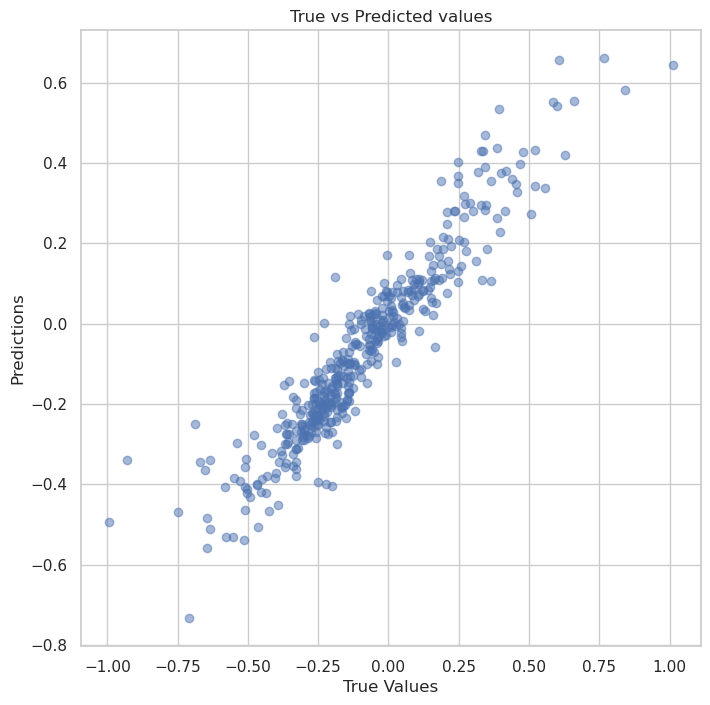

In [31]:
# Plot y_pred vs y_test
plt.figure(figsize=(8, 8))
plt.scatter(y_test_scaled, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted values')
plt.show()

In [32]:
history.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 232)            │        55,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 232)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           233 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,349 (649.80 KB)

 Trainable params: 55,449 (216.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,900 (433.21 KB)